### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



Implementação em Python
1. Gerar um dataset de treino linearmente separável
2. Plotar dataset de treino (hiperplano separador)
3. Implementar classificador Perceptron
  a. Implementar o esqueleto da classe
  b. Implementar o método predict (w aleatório)
  c. Implementar o método fit
    i. y estimado
    ii. erro
    iii. custo
    iV. atualização de w
4. Avaliar a acurácia em um dataset de teste

In [15]:
# 1. Gerar um dataset de treino linearmente separável

import numpy as np

def geradataset(tamanho=20):
  X = np. random.uniform(size=(tamanho,2)) #X aleatório com dataset com 20 instâncias e 2 características
  y = np.array(X[:,0]>X[:,1],dtype=int)*2-1  #y(rótulo) 
  return X,y

X,y = geradataset(20)
X,y


(array([[0.08134219, 0.60732774],
        [0.26026011, 0.22402106],
        [0.20905537, 0.43511827],
        [0.31978809, 0.0486409 ],
        [0.08636948, 0.41846678],
        [0.3579469 , 0.81582644],
        [0.50847108, 0.21594822],
        [0.62680988, 0.01071536],
        [0.48779557, 0.81586453],
        [0.60372485, 0.19271944],
        [0.8111098 , 0.43912109],
        [0.3738486 , 0.16856673],
        [0.19062211, 0.66145396],
        [0.8963826 , 0.27997132],
        [0.17614665, 0.46731558],
        [0.92602808, 0.46577689],
        [0.43481853, 0.53868489],
        [0.71476414, 0.58601889],
        [0.11451479, 0.45048918],
        [0.28962308, 0.07736853]]),
 array([-1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
         1, -1,  1]))

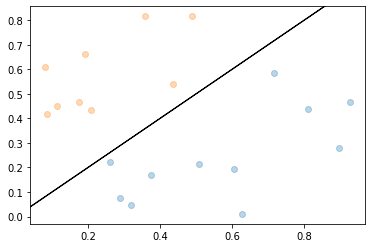

In [16]:
#2. Plotar dataset de treino (hiperplano separador) 

import matplotlib.pyplot as plt

def plotadataset(X,y):   #função plota o dataset
    for k in set(y):
       plt.plot(X[:,0][y==k],X[:,1][y==k],"o",alpha=0.3)

plotadataset(X,y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

hiperplano = perpendicular(vetor)

plotavetor(hiperplano)

In [26]:
#3. Implementar classificador Perceptron

from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
  @staticmethod
  def erro(y,ypred):
    return y - ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum(CustoPerceptron.erro(y,ypred)**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(CustoPerceptron.erro(y,ypred),X)

class HingeLoss():
  @staticmethod
  def erro(y,ypred):
    return np.multiply(y,ypred)
  @staticmethod
  def custo(y,ypred):
    return np.sum(1 - HingeLoss.erro(y,ypred))
  @staticmethod
  def gradiente(y,ypred, X):
    marginais =  HingeLoss.erro(y,ypred) < 1
    return np.matmul(y[marginais],X[marginais])


class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo
  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=2)
    for _ in range(self.maxiter):
      ypred = self.predict(X)
      custo = self.custo.custo(y,ypred)
      self.w = self.w + self.alpha*self.custo.gradiente(y,ypred,X)
      if custo == 0:
         break

  def predict(self,X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)
    return ypred



1.0
[ 1.323066   -1.30453545]


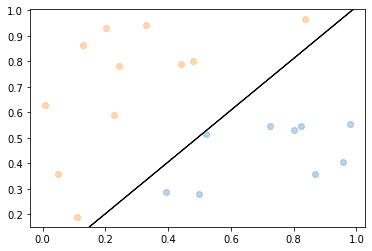

0.995
[ 1.323066   -1.30453545]


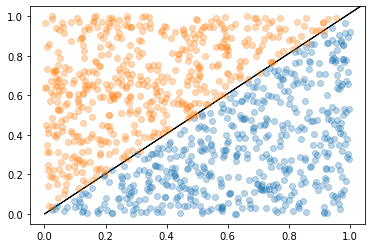

In [27]:
X,y = geradataset(20)

#Perceptron com CustoPerceptron
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(sum(y == ypred) /len(y))

plotadataset(X,y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()


#Perceptron com HingeLoss
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(sum(y == ypred) /len(y))

plotadataset(X,y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()




In [ ]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred) /len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

In [18]:
#algoritmo base do perceptron
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
sum(yte == ypred) /len(yte)


0.998

0.984
[ 1.75415278 -1.80834479]


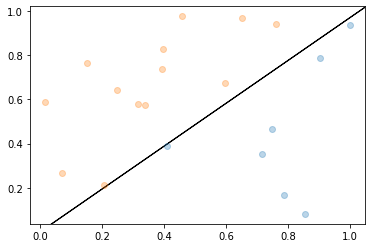

In [19]:
X, y = geradataset(20)
perceptron.fit(X,y)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred) /len(yte))

plotadataset(X,y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.985
[ 1.75415278 -1.80834479]


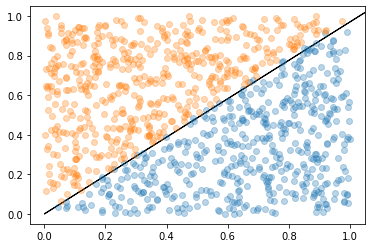

In [20]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred) /len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))